In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import os
from utils.config import path_dir_descriptor, path_dir_data, path_dir_tsOutput, Poly_degree, path_file_mapping
from datapre.preprocessTools import loadTrainingDataFeatures
from sklearn import preprocessing
# Load feature matrix

iD, X = loadTrainingDataFeatures(isNormalized=True)

In [2]:
print(iD)
print(iD.size)
print(X)
print(X.shape)

#X = [1_Substrate] + [2_Base or Conjugate] + [3_Hydroxyamine or Oxoammonium] + [4_Anti or Syn Ligand]
#ID: 

[['Sub-A_CA-A_Hyd-A_LigS-A']
 ['Sub-A_CA-A_Hyd-A_LigS-B']
 ['Sub-A_CA-A_Hyd-A_LigS-C']
 ...
 ['Sub-AC_Base-E_Oxo-F_LigA-D']
 ['Sub-AC_Base-E_Oxo-F_LigA-E']
 ['Sub-AC_Base-E_Oxo-F_LigA-F']]
41760
[[-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  8.95951640e-01
  -3.28329459e-01  3.46483461e-01]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  1.65038990e+00
  -2.18564586e+00 -1.81874912e+00]
 [-7.24498693e-01 -7.55462047e-01 -2.62020539e-01 ...  5.49305691e-01
  -1.22838386e-03  6.76394299e-01]
 ...
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.87182068e+00
   3.63075174e-01  5.76187736e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ... -1.08770845e+00
   6.50166031e-01  4.23565433e-01]
 [-1.05197923e+00  1.52116379e+00 -1.11419949e+00 ...  7.11163721e-01
   1.28541597e+00  1.19477056e-02]]
(41760, 32)


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def createSubSet(X, nsample = 10000):
    idx = np.random.randint(X.shape[0], size=nsample)
    return X[idx,:],idx

def visualize3D(X, colors=0):
    if colors is visualize3D.__defaults__[0]:
        colors = np.zeros(X.shape[0], dtype=int)
    fig = plt.figure(1, figsize=(8, 8))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    plt.cla()
    pca3 = PCA(n_components=3)
    pca3.fit(X)
    X2 = pca3.transform(X)
    #ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], cmap=plt.cm.nipy_spectral, edgecolor='k')
    ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c = colors, cmap='winter', edgecolor='k')
    plt.show()
    
def visualize2D(X, colors=0):
    if colors is visualize3D.__defaults__[0]:
        colors = np.zeros(X.shape[0], dtype=int)
    pca2 = PCA(n_components=2)
    pca2.fit(X)
    X2 = pca2.transform(X)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.scatter(X2[:, 0]
               , X2[:,1]
               , c = colors
               , s = 50)
    ax.grid()
    plt.show()

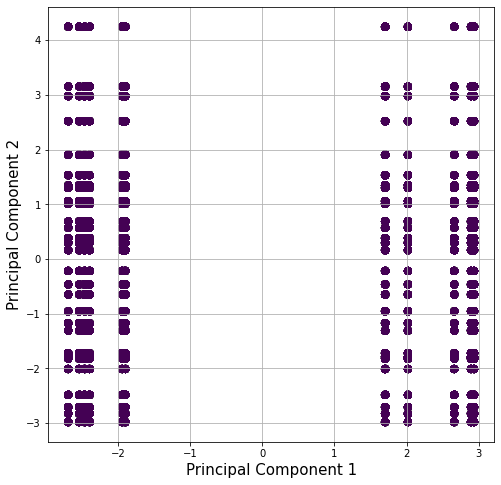

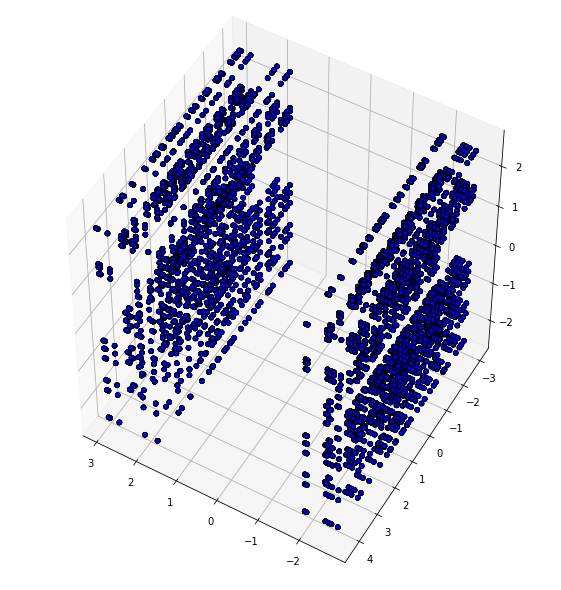

In [4]:
visualize2D(X)
visualize3D(X)

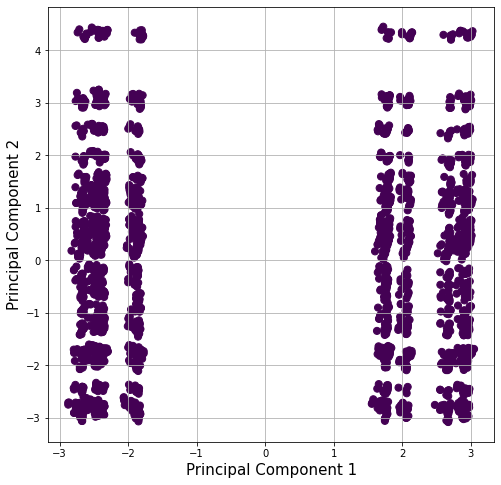

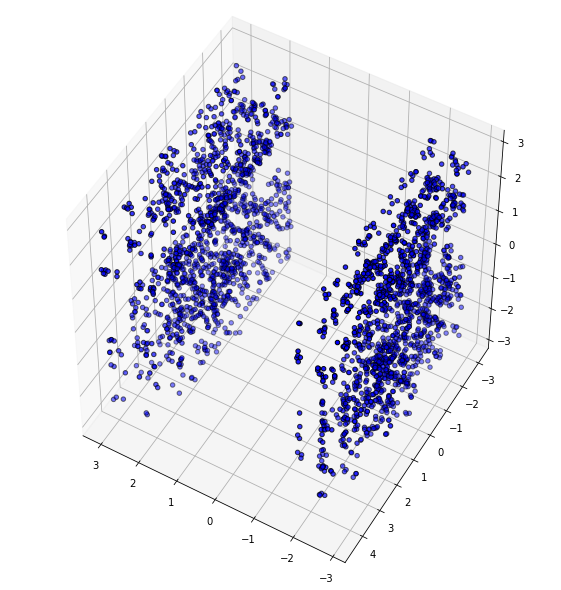

In [5]:
X1, idX1 = createSubSet(X, 3000)
iD1 = iD[idX1]
visualize2D(X1)
visualize3D(X1)


In [6]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X1)

In [7]:
kmedoids.labels_

array([1, 1, 0, ..., 0, 0, 1])

In [8]:
kmedoids.cluster_centers_

array([[-0.06953761, -0.72246747, -0.2924555 ,  0.10836568,  0.30809963,
        -0.7791425 , -0.21986577,  0.11681878, -0.10549028, -0.0034729 ,
        -1.16887229, -0.40482677, -0.61076569, -0.18414314, -1.14333335,
        -1.17802268, -0.82447391,  0.72860311, -0.10859558, -0.63909393,
         0.96602785,  0.98905719,  0.84339192, -1.26825972, -0.94499276,
         0.        ,  0.        ,  0.        , -1.05861274, -0.79411596,
         0.17916856, -0.20542345],
       [-0.19018834, -0.75546205,  0.85392809, -0.37702022,  0.28211056,
        -0.70352883, -0.22240427,  0.18662518, -0.22408783, -0.0034729 ,
        -1.16887229, -0.40482677,  1.17005815, -0.267837  ,  0.77417228,
         1.04426558, -0.13679612, -1.39096957,  0.64755141, -0.75886939,
        -1.01188632, -0.96585133, -0.757629  ,  1.04442478,  1.07691377,
         0.        ,  0.        ,  0.        , -1.05861274, -0.79411596,
         0.17916856, -0.20542345]])

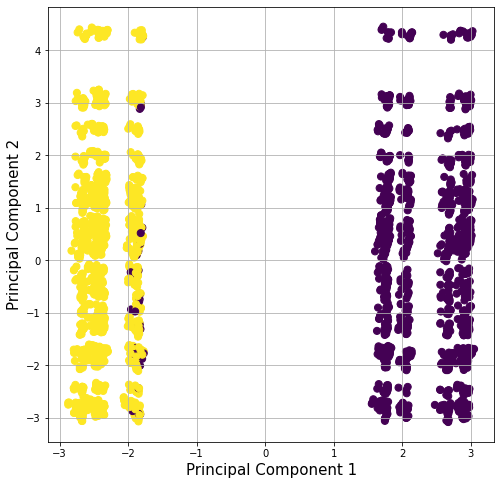

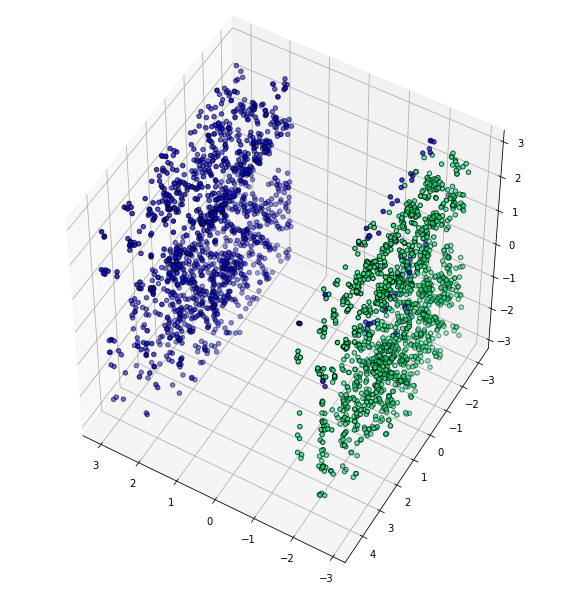

In [9]:
visualize2D(X1, kmedoids.labels_)
visualize3D(X1, kmedoids.labels_)

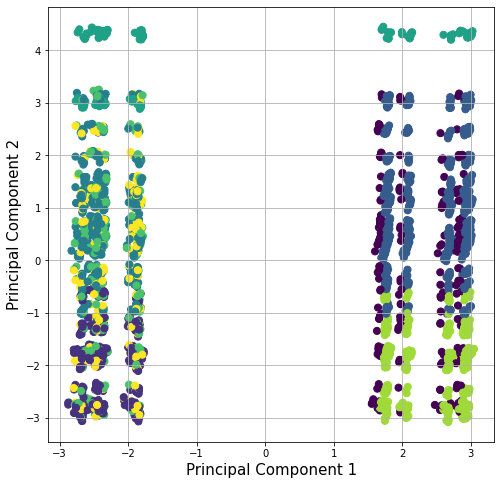

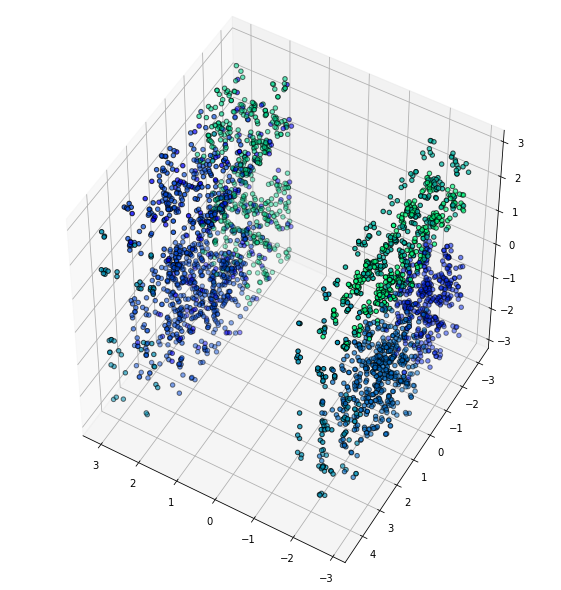

In [10]:
from sklearn.cluster import KMeans
km = KMeans(8)
clusts = km.fit_predict(X1)
visualize2D(X1, clusts)
visualize3D(X1, clusts)

In [ ]:
idx = np.arange(0, X1.shape[0], 1)
idx0 = idx[clusts==0]
idx1 = idx[clusts==1]

print(iD[idx0].shape, iD[idx1].shape)
df1 = pd.DataFrame(data = iD1[idx0],columns={'id'})
df1["cluster"] = clusts[idx0]
df2 = pd.DataFrame(data = iD1[idx1],columns={'id'})
df2["cluster"] = clusts[idx1]
df = pd.concat([df1,df2])
df.to_csv('clusters.csv', index=False)
df.head()

In [11]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3).fit(X1)

visualize2D(X1, dbscan.labels_)
visualize3D(X1, dbscan.labels_)

(207, 1) (363, 1)


,id,cluster
0,Sub-O_CA-D_Oxo-B_LigS-B,0
1,Sub-L_Base-D_Oxo-C_LigA-B,0
2,Sub-R_Base-D_Oxo-D_LigS-B,0
3,Sub-N_CA-C_Oxo-D_LigA-B,0
4,Sub-B_CA-A_Oxo-F_LigA-B,0


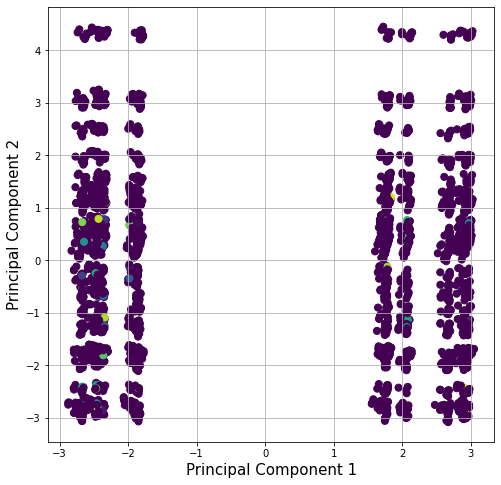

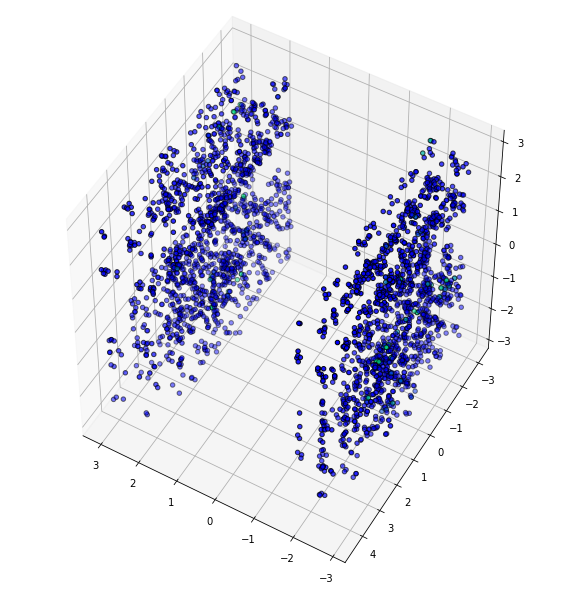

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=3).fit(X1)

visualize2D(X1, dbscan.labels_)
visualize3D(X1, dbscan.labels_)